In [1]:
import pandas

iris = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,4.8,3.0,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa


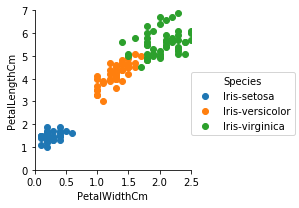

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(iris,hue="Species")
g.set(xlim=(0,2.5),ylim=(0,7))
g.map(plt.scatter, 'PetalWidthCm','PetalLengthCm').add_legend()

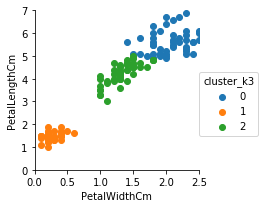

In [20]:
from sklearn.cluster import KMeans
km = KMeans(3)
X = iris[['PetalWidthCm','PetalLengthCm']]
km.fit(X)
#km.predict(X)
iris['cluster_k3'] = km.predict(X)
g = sns.FacetGrid(iris,hue="cluster_k3")
g.set(xlim=(0,2.5),ylim=(0,7))
g.map(plt.scatter, 'PetalWidthCm','PetalLengthCm').add_legend()


In [21]:
from sklearn import datasets
from pandas import DataFrame
noisy_circles = datasets.make_circles(n_samples=1000,factor=0.5,noise=0.05)
print(noisy_circles)

(array([[ 0.28159296, -0.26928831],
       [-0.16389427, -0.44684707],
       [ 0.40053999, -0.27569601],
       ...,
       [-0.37030615, -0.23215208],
       [ 0.35142014, -0.35041628],
       [ 0.10073389,  0.5491667 ]]), array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [23]:
df = DataFrame()
df['x1'] = noisy_circles[0][:,0]
df['x2'] = noisy_circles[0][:,1]
df['label'] = noisy_circles[1]
df.sample(10)

,x1,x2,label
491,1.070783,0.112653,0
557,1.025584,0.068304,0
608,-0.614550,0.865811,0
490,-0.347027,-0.354474,1
541,1.007120,0.328279,0
192,-0.987399,-0.209863,0
999,0.100734,0.549167,1
197,-0.228806,1.015935,0
766,-0.456719,-0.197705,1
875,-0.127695,0.969266,0


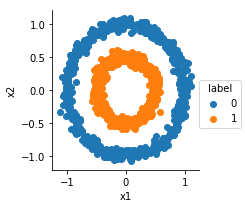

In [25]:
g = sns.FacetGrid(df,hue="label")
g.map(plt.scatter, 'x1','x2').add_legend()

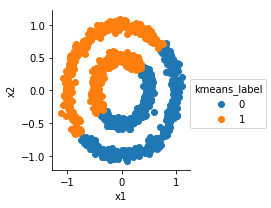

In [32]:
from sklearn.cluster import KMeans
km = KMeans(2)
x = df[['x1','x2']]
km.fit(x)
df['kmeans_label'] = km.labels_
g = sns.FacetGrid(df,hue="kmeans_label")
g.map(plt.scatter, 'x1','x2').add_legend()

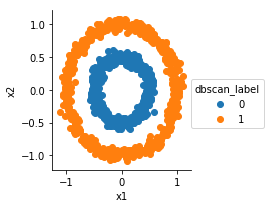

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)

x = df[['x1','x2']]
dbscan.fit(x)
df['dbscan_label'] = dbscan.labels_
g = sns.FacetGrid(df,hue="dbscan_label")
g.map(plt.scatter, 'x1','x2').add_legend()